In [1]:
import pandas as pd

In [2]:
u="https://planificateur.a-contresens.net/afrique/classement_par_pays/superficie-AF.html"
data=pd.read_html(u)

In [3]:
data[0].to_excel("superficie-africa.xlsx")

In [4]:
data=data[0]

In [6]:
data.columns

Index(['Classement', 'Continent', 'Pays', 'Superficie'], dtype='object')

In [7]:
data=data.drop(['Continent'],axis=1)

In [8]:
data

,Classement,Pays,Superficie
0,1,Algérie,2.38 millions km2
1,2,République démocratique du Congo,2.34 millions km2 - Eau : 77810 km2 (3.32%)
2,3,Soudan,1.86 millions km2
3,4,Libye,1.76 millions km2
4,5,Tchad,1.28 millions km2
5,6,Niger,1.27 millions km2
6,7,Angola,1.25 millions km2
7,8,Mali,1.24 millions km2 - Eau : 20002 km2 (1.61%)
8,9,Afrique du Sud,1.22 millions km2 - Eau : 4620 km2 (0.38%)
9,10,Éthiopie,1.1 millions km2 - Eau : 104300 km2 (9.44%)


In [8]:
i=data.columns
data=pd.DataFrame({i[0]:data[i[0]],i[1]:data[i[1]],i[2]:data[i[2]].apply(lambda x:  x.replace('millions','000000'))})
data.head()

,Classement,Pays,Superficie
0,1,Algérie,2.38 000000 km2
1,2,République démocratique du Congo,2.34 000000 km2 - Eau : 77810 km2 (3.32%)
2,3,Soudan,1.86 000000 km2
3,4,Libye,1.76 000000 km2
4,5,Tchad,1.28 000000 km2


In [9]:
i=data.columns
def supeau(s):
    # 2.34 000000 km2 - Eau : 77810 km2 (3.32%)
    if 'Eau :' in s:
        d=s.split('Eau :')
        s=d[0].split('km2')[0].strip()
        if ' ' in s:
            a=s.split(' ')
            x=a[0]
            y='1'+a[1]
            s=float(x)*float(y)
            s=str(s)
        e=d[1].split('km2')[0]
        s=float(s)
        e=float(e)
    else:
        s=s.split('km2')[0]
        if ' ' in s:
            a=s.split(' ')
            x=a[0]
            y='1'+a[1]
            s=float(x)*float(y)
            s=str(s)
        else:
            s=s
        s=float(s)
        e=0.0
    return [e,s]
print(supeau('9.0 00000'))
donne=pd.DataFrame({i[0]:data[i[0]],i[1]:data[i[1]],'Eau':data[i[2]].apply(lambda c : supeau(c)[0]),i[2]:data[i[2]].apply(lambda x: supeau(x)[1])})

[0.0, 900000.0]


In [10]:
data=donne
data.to_csv("superficie-africa.csv")

<Axes: ylabel='Superficie'>

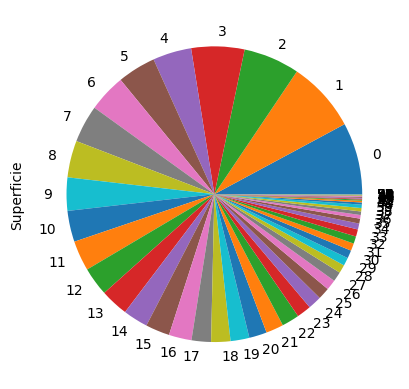

In [12]:
data['Superficie'].plot.pie()

<Axes: >

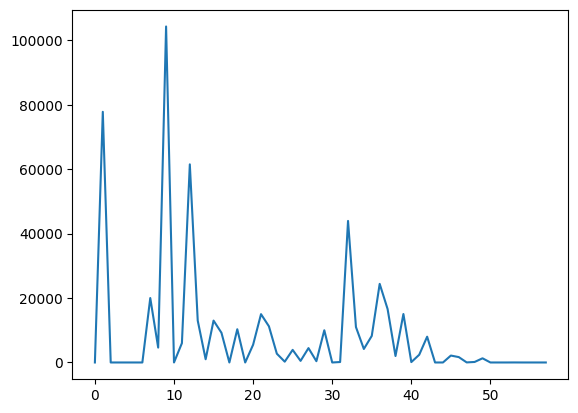

In [13]:
data['Eau'].plot()

In [14]:
data.iloc[[4],[3]]

,Superficie
4,1280000.0


In [17]:
data['Eau'].mean()

8899.224137931034

In [ ]:
data['all']=data['Superficie']+data['Eau']

In [99]:
data

,Classement,Pays,Eau,Superficie,all
0,1,Algérie,0.0,2380000.0,2380000.0
1,2,République démocratique du Congo,77810.0,2340000.0,2417810.0
2,3,Soudan,0.0,1860000.0,1860000.0
3,4,Libye,0.0,1760000.0,1760000.0
4,5,Tchad,0.0,1280000.0,1280000.0
5,6,Niger,0.0,1270000.0,1270000.0
6,7,Angola,0.0,1250000.0,1250000.0
7,8,Mali,20002.0,1240000.0,1260002.0
8,9,Afrique du Sud,4620.0,1220000.0,1224620.0
9,10,Éthiopie,104300.0,1100000.0,1204300.0


<Axes: >

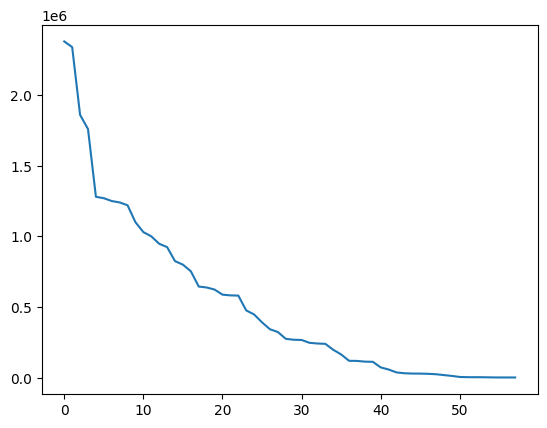

In [22]:
data['Superficie'].plot()

In [29]:
dat=pd.DataFrame(data['Eau'])

In [30]:
dat=pd.concat([dat,data])

In [32]:
data

,Classement,Pays,Eau,Superficie
0,1,Algérie,0.0,2380000.0
1,2,République démocratique du Congo,77810.0,2340000.0
2,3,Soudan,0.0,1860000.0
3,4,Libye,0.0,1760000.0
4,5,Tchad,0.0,1280000.0
5,6,Niger,0.0,1270000.0
6,7,Angola,0.0,1250000.0
7,8,Mali,20002.0,1240000.0
8,9,Afrique du Sud,4620.0,1220000.0
9,10,Éthiopie,104300.0,1100000.0


In [2]:
data.info()

NameError: name 'data' is not defined

In [1]:
data

NameError: name 'data' is not defined